# INTRODUCTION

We try to predict the genetic disorder of patients based on multiple features

# IMPORT & SETUP

In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# from matplotlib.gridspec import GridSpec
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LeakyReLU
# from tensorflow.keras.activations import linear, relu, sigmoid
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, mean_absolute_error, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
file_path = 'dataset/train.csv'
data = pd.read_csv(file_path)

# THE DATASET

##### Features: 
###### We see here an example entry from the dataset, we count 45 features, two of which are target features
| **Column name**                                  | **Column description**                                                                                                                    |
| ------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------- |
| Patient Id                                       | Represents the unique identification number of a patient                                                                                  |
| Patient Age                                      | Represents the age of a patient                                                                                                           |
| Genes in mother's side                           | Represents a gene defect in a patient's mother                                                                                            |
| Inherited from father                            | Represents a gene defect in a patient's father                                                                                            |
| Maternal gene                                    | Represents a gene defect in the patient's maternal side of the family                                                                     |
| Paternal gene                                    | Represents a gene defect in a patient's paternal side of the family                                                                       |
| Blood cell count (mcL)                           | Represents the blood cell count of a patient                                                                                              |
| Patient First Name                               | Represents a patient's first name                                                                                                         |
| Family Name                                      | Represents a patient's family name or surname                                                                                             |
| Father's name                                    | Represents a patient's father's name                                                                                                      |
| Mother's age                                     | Represents a patient's mother's name                                                                                                      |
| Father's age                                     | Represents a patient's father's age                                                                                                       |
| Institute Name                                   | Represents the medical institute where a patient was born                                                                                 |
| Location of Institute                            | Represents the location of the medical institute                                                                                          |
| Status                                           | Represents whether a patient is deceased                                                                                                  |
| Respiratory Rate (breaths/min)                   | Represents a patient's respiratory breathing rate                                                                                         |
| Heart Rate (rates/min)                           | Represents a patient's heart rate                                                                                                         |
| Test 1 - Test 5                                  | Represents different (masked) tests that were conducted on a patient                                                                      |
| Parental consent                                 | Represents whether a patient's parents approved the treatment plan                                                                        |
| Follow-up                                        | Represents a patient's level of risk (how intense their condition is)                                                                     |
| Gender                                           | Represents a patient's gender                                                                                                             |
| Birth asphyxia                                   | Represents whether a patient suffered from birth asphyxia                                                                                 |
| Autopsy shows birth defect (if applicable)       | Represents whether a patient's autopsy showed any birth defects                                                                           |
| Place of birth                                   | Represents whether a patient was born in a medical institute or home                                                                      |
| Folic acid details (peri-conceptional)           | Represents the periconceptional folic acid supplementation details of a patient                                                           |
| H/O serious maternal illness                     | Represents an unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother |
| H/O radiation exposure (x-ray)                   | Represents whether a patient has any radiation exposure history                                                                           |
| H/O substance abuse                              | Represents whether a parent has a history of drug addiction                                                                               |
| Assisted conception IVF/ART                      | Represents the type of treatment used for infertility                                                                                     |
| History of anomalies in previous pregnancies     | Represents whether the mother had any anomalies in her previous pregnancies                                                               |
| No. of previous abortion                         | Represents the number of abortions that a mother had                                                                                      |
| Birth defects                                    | Represents whether a patient has birth defects                                                                                            |
| White Blood cell count (thousand per microliter) | Represents a patient's white blood cell count                                                                                             |
| Blood test result                                | Represents a patient's blood test results                                                                                                 |
| Symptom 1 - Symptom 5                            | Represents (masked) different types of symptoms that a patient had                                                                        |
| Genetic Disorder                                 | Represents the genetic disorder that a patient has                                                                                        |
| Disorder Subclass                                | Represents the subclass of the disorder                                                                                                   |

##### Target features

In [3]:
disease_col = 'Genetic Disorder'
subclass_col = 'Disorder Subclass'
grouped_data = data.groupby([disease_col, subclass_col]).size().reset_index(name='Count')
num_combinations = grouped_data.shape[0]

print("Number of entries in the dataset:", len(data))

print("\nUnique Combinations of Disease and Subclass:")
grouped_data.head(10)

Number of entries in the dataset: 22083

Unique Combinations of Disease and Subclass:


,Genetic Disorder,Disorder Subclass,Count
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,587
1,Mitochondrial genetic inheritance disorders,Leigh syndrome,4683
2,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,3971
3,Multifactorial genetic inheritance disorders,Alzheimer's,133
4,Multifactorial genetic inheritance disorders,Cancer,91
5,Multifactorial genetic inheritance disorders,Diabetes,1653
6,Single-gene inheritance diseases,Cystic fibrosis,3145
7,Single-gene inheritance diseases,Hemochromatosis,1228
8,Single-gene inheritance diseases,Tay-Sachs,2556


###### There are 3 genetic disorders, each with 3 subclasses. 
###### We notice that there are null entries in the target features, these will not be able to controbute to the model

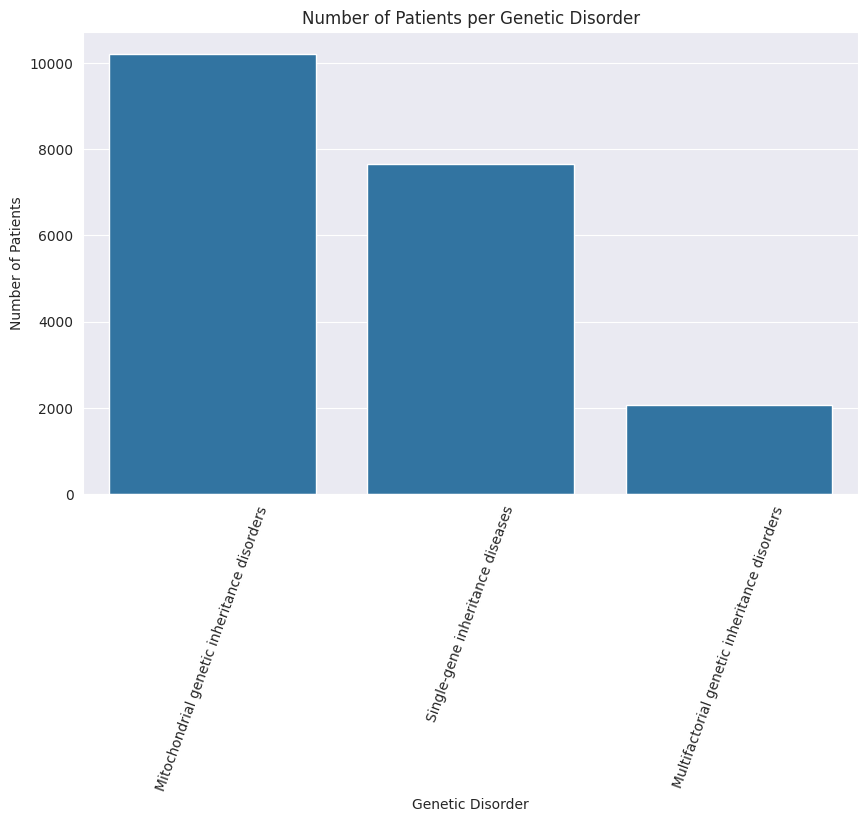

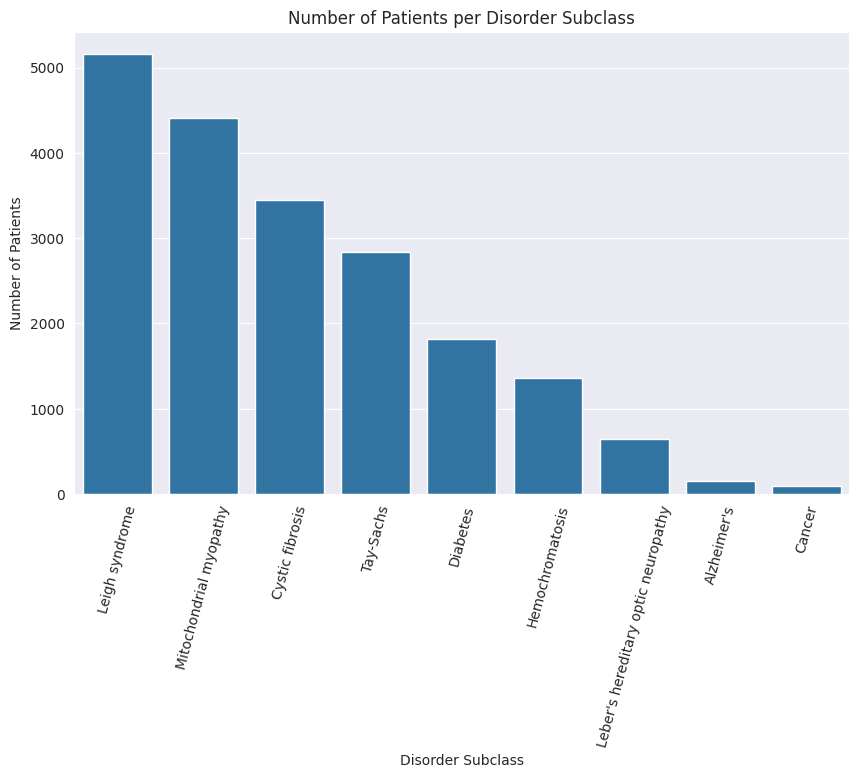

In [4]:
graph_data = data.copy()
# Counting patients for each disease and subclass
disease_count = graph_data[disease_col].value_counts()
subclass_count = graph_data[subclass_col].value_counts()

# Plotting Bar Chart for Diseases
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_count.index, y=disease_count.values)
plt.title('Number of Patients per Genetic Disorder')
plt.ylabel('Number of Patients')
plt.xlabel('Genetic Disorder')
plt.xticks(fontsize=10, rotation=70)
plt.show()

# Plotting Bar Chart for Subclasses
plt.figure(figsize=(10, 6))
sns.barplot(x=subclass_count.index, y=subclass_count.values)
plt.title('Number of Patients per Disorder Subclass')
plt.ylabel('Number of Patients')
plt.xlabel('Disorder Subclass')
plt.xticks(fontsize=10, rotation=75)
plt.show()

##### We can change most of the unknown Genetic Disorders to be of the correct type

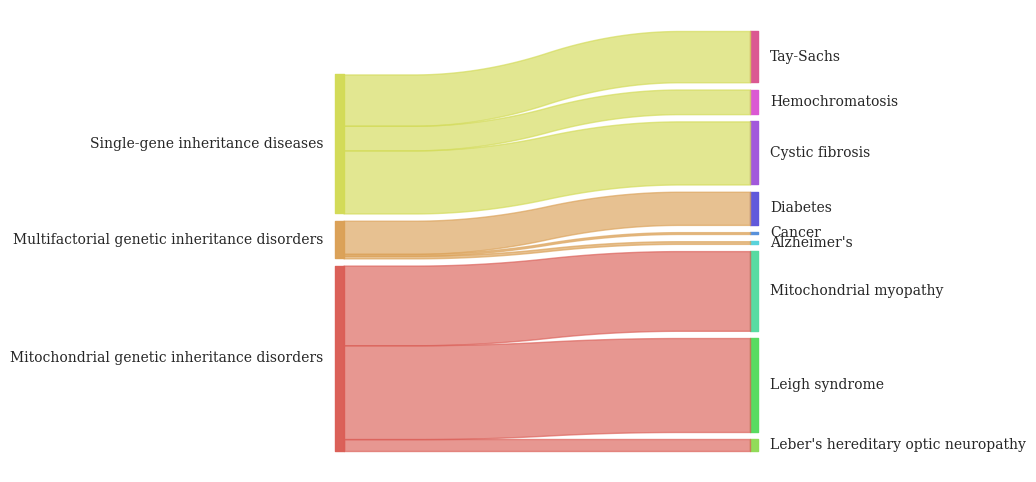

In [5]:
from pySankey import sankey

grouped_subclass = graph_data.groupby(["Genetic Disorder", "Disorder Subclass"], sort='Genetic Disorder',
                                      as_index=False).size()
count_class = graph_data.groupby(["Genetic Disorder"], sort='Genetic Disorder', as_index=False).size()

sankey.sankey(
    grouped_subclass["Genetic Disorder"], grouped_subclass["Disorder Subclass"], rightWeight=grouped_subclass['size'],
    leftWeight=grouped_subclass['size'], aspect=10, figure_name="Sankey for Genetic Disorder",
    fontsize=10
)

# PRE-PROCESSING

##### We first start by removing all the entries where both taget features are unknown.

In [6]:
print("Number of entries in the dataset before cleaning:", len(data))

grouped_data = data.groupby(['Genetic Disorder', 'Disorder Subclass'], dropna=False, as_index=False).size()
na_set = grouped_data['Genetic Disorder'].isna() & grouped_data['Disorder Subclass'].isna()
null_both_count = grouped_data[na_set]['size'].iloc[0]

print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")

data_1 = data.dropna(subset=["Genetic Disorder", "Disorder Subclass"], how='all')
print("Number of entries after cleaning dataset =", data_1.shape[0])

grouped_data = data_1.groupby(['Genetic Disorder', 'Disorder Subclass'], dropna=False, as_index=False).size()
na_set = grouped_data['Genetic Disorder'].isna() & grouped_data['Disorder Subclass'].isna()

null_both_count = grouped_data[na_set]['size'].size
print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")

Number of entries in the dataset before cleaning: 22083
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 278
Number of entries after cleaning dataset = 21805
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 0


We see that there are still some entries with null values in the Genetic Disorder column, we will try to fill them using the Disorder Subclass column

In [286]:
# remove irrelevant features
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name", "Parental consent",
                   'Patient First Name', 'Family Name', 'Patient Id']
dataset = data_1.drop(columns=columns_to_drop)
# Fill missing values in 'Genetic Disorder' based on 'Disorder Subclass'
subclass_to_disorder = {
    'Leber\'s hereditary optic neuropathy': 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders',
    'Alzheimer\'s': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cystic fibrosis': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
}

dataset['Genetic Disorder'] = dataset.apply(
    lambda row: subclass_to_disorder[row['Disorder Subclass']]
    if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)
dataset = dataset.dropna(subset=['Disorder Subclass'], how='all')
dataset = dataset[dataset['Genetic Disorder'] != 'Multifactorial genetic inheritance disorders']

#  NUMERICAL --> MEDIAN IMPUTER


# CATEGORIAL BINARY
mode_imputer = SimpleImputer(strategy='most_frequent')
dataset['Autopsy shows birth defect (if applicable)'] = dataset['Autopsy shows birth defect (if applicable)'].replace({'Yes': 1.0, 'No': 0.0, 'Not applicable': 2})
dataset['H/O substance abuse'] = dataset['H/O substance abuse'].replace({'No': 0.0, 'Yes': 1.0, 'Not applicable': 2, '-': 3})
dataset['Inherited from father'] = dataset['Inherited from father'].replace({'No': 0.0, 'Yes': 1.0})
dataset['Maternal gene'] = dataset['Maternal gene'].replace({'No': 0.0, 'Yes': 1.0})
dataset['History of anomalies in previous pregnancies'] = dataset['History of anomalies in previous pregnancies'].replace({'Yes': 1.0, 'No': 0.0})
dataset['H/O serious maternal illness'] = dataset['H/O serious maternal illness'].replace({'Yes': 1.0, 'No': 0.0})
dataset['H/O radiation exposure (x-ray)'] = dataset['H/O radiation exposure (x-ray)'].replace({'No': 0.0, '-': 3, 'Not applicable': 2, 'Yes': 1.0})
dataset['Place of birth'] = dataset['Place of birth'].replace({'Institute': 1.0, 'Home': 0.0})
dataset['Birth asphyxia'] = dataset['Birth asphyxia'].replace({'No': 0, 'No record': 2, 'Not available':3, 'Yes': 1})
dataset['Respiratory Rate (breaths/min)'] = dataset['Respiratory Rate (breaths/min)'].replace({'Normal (30-60)': 0.0, 'Tachypnea': 1.0})
dataset['Heart Rate (rates/min'] = dataset['Heart Rate (rates/min'].replace({'Normal': 0.0, 'Tachycardia': 1.0})
dataset['Follow-up'] = dataset['Follow-up'].replace({'High': 1.0, 'Low': 0.0})
dataset['Folic acid details (peri-conceptional)'] = dataset['Folic acid details (peri-conceptional)'].replace({'Yes': 1.0, 'No': 0.0})
dataset['Assisted conception IVF/ART'] = dataset['Assisted conception IVF/ART'].replace({'Yes': 1.0, 'No': 0.0})
dataset['Birth defects'] = dataset['Birth defects'].replace({'Multiple': 1.0, 'Singular': 0.0})
dataset['Gender'] = dataset['Gender'].replace({'Male': 1.0, 'Female': 0.0, 'Ambiguous': 2.0})
dataset['Blood test result'] = dataset['Blood test result'].replace({'normal': 0.0, 'inconclusive': -1, 'slightly abnormal': 1, 'abnormal': 2})
dataset["Genes in mother's side"] = dataset["Genes in mother's side"].replace({'Yes': 1.0, 'No': 0.0})
dataset["Paternal gene"] = dataset["Paternal gene"].replace({'Yes': 1.0, 'No': 0.0})
dataset["Status"] = dataset["Status"].replace({'Alive': 0.0, 'Deceased': 1.0})

dataset['Symptom 2'] = dataset['Symptom 2']
dataset['Symptom 1'] = dataset['Symptom 1']
dataset['Symptom 3'] = dataset['Symptom 3']
dataset['Symptom 4'] = dataset['Symptom 4']
dataset['Symptom 5'] = dataset['Symptom 5']
dataset['Test 3'] = dataset['Test 3'].fillna(1)
dataset['Test 2'] = dataset['Test 2'].fillna(1)
dataset['Test 1'] = dataset['Test 1'].fillna(1)
dataset['Test 4'] = dataset['Test 4'].fillna(0)
dataset['Test 5'] = dataset['Test 5'].fillna(1)

# dataset = dataset.dropna(subset=['Symptom 4', 'Symptom 5'])
#-------------------------------------------------------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--------------------------------#
genetic_disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 0, 
    # 'Multifactorial genetic inheritance disorders': 0, 
    'Single-gene inheritance diseases': 1, 
}
dataset['Genetic Disorder'] = dataset['Genetic Disorder'].map(genetic_disorder_mapping)

disorder_subclass_mapping = {
    "Leber's hereditary optic neuropathy":0,  
    'Cystic fibrosis': 1,
    # 'Diabetes': 2,
    'Leigh syndrome': 2,
    'Tay-Sachs': 3,  
    'Mitochondrial myopathy': 4,
    'Hemochromatosis': 5,
    # "Alzheimer's": 7,
    # 'Cancer':8,  
}

dataset['Disorder Subclass'] = dataset['Disorder Subclass'].map(disorder_subclass_mapping)
heat_data = dataset.copy().dropna()
# heat_data = heat_data[heat_data.isnull().sum(axis=1) < 5]


In [266]:
imputer = SimpleImputer(strategy='most_frequent')
heat_data.iloc[:, 0:34] = imputer.fit_transform(heat_data.iloc[:, 0:34])

In [285]:
knn_imputer = KNNImputer(n_neighbors=5)
heat_data.iloc[:,0:34] = knn_imputer.fit_transform(heat_data.iloc[:,0:34])

In [287]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
heat_data.iloc[:,0:34] = scaler.fit_transform(heat_data.iloc[:,0:34])

<Axes: >

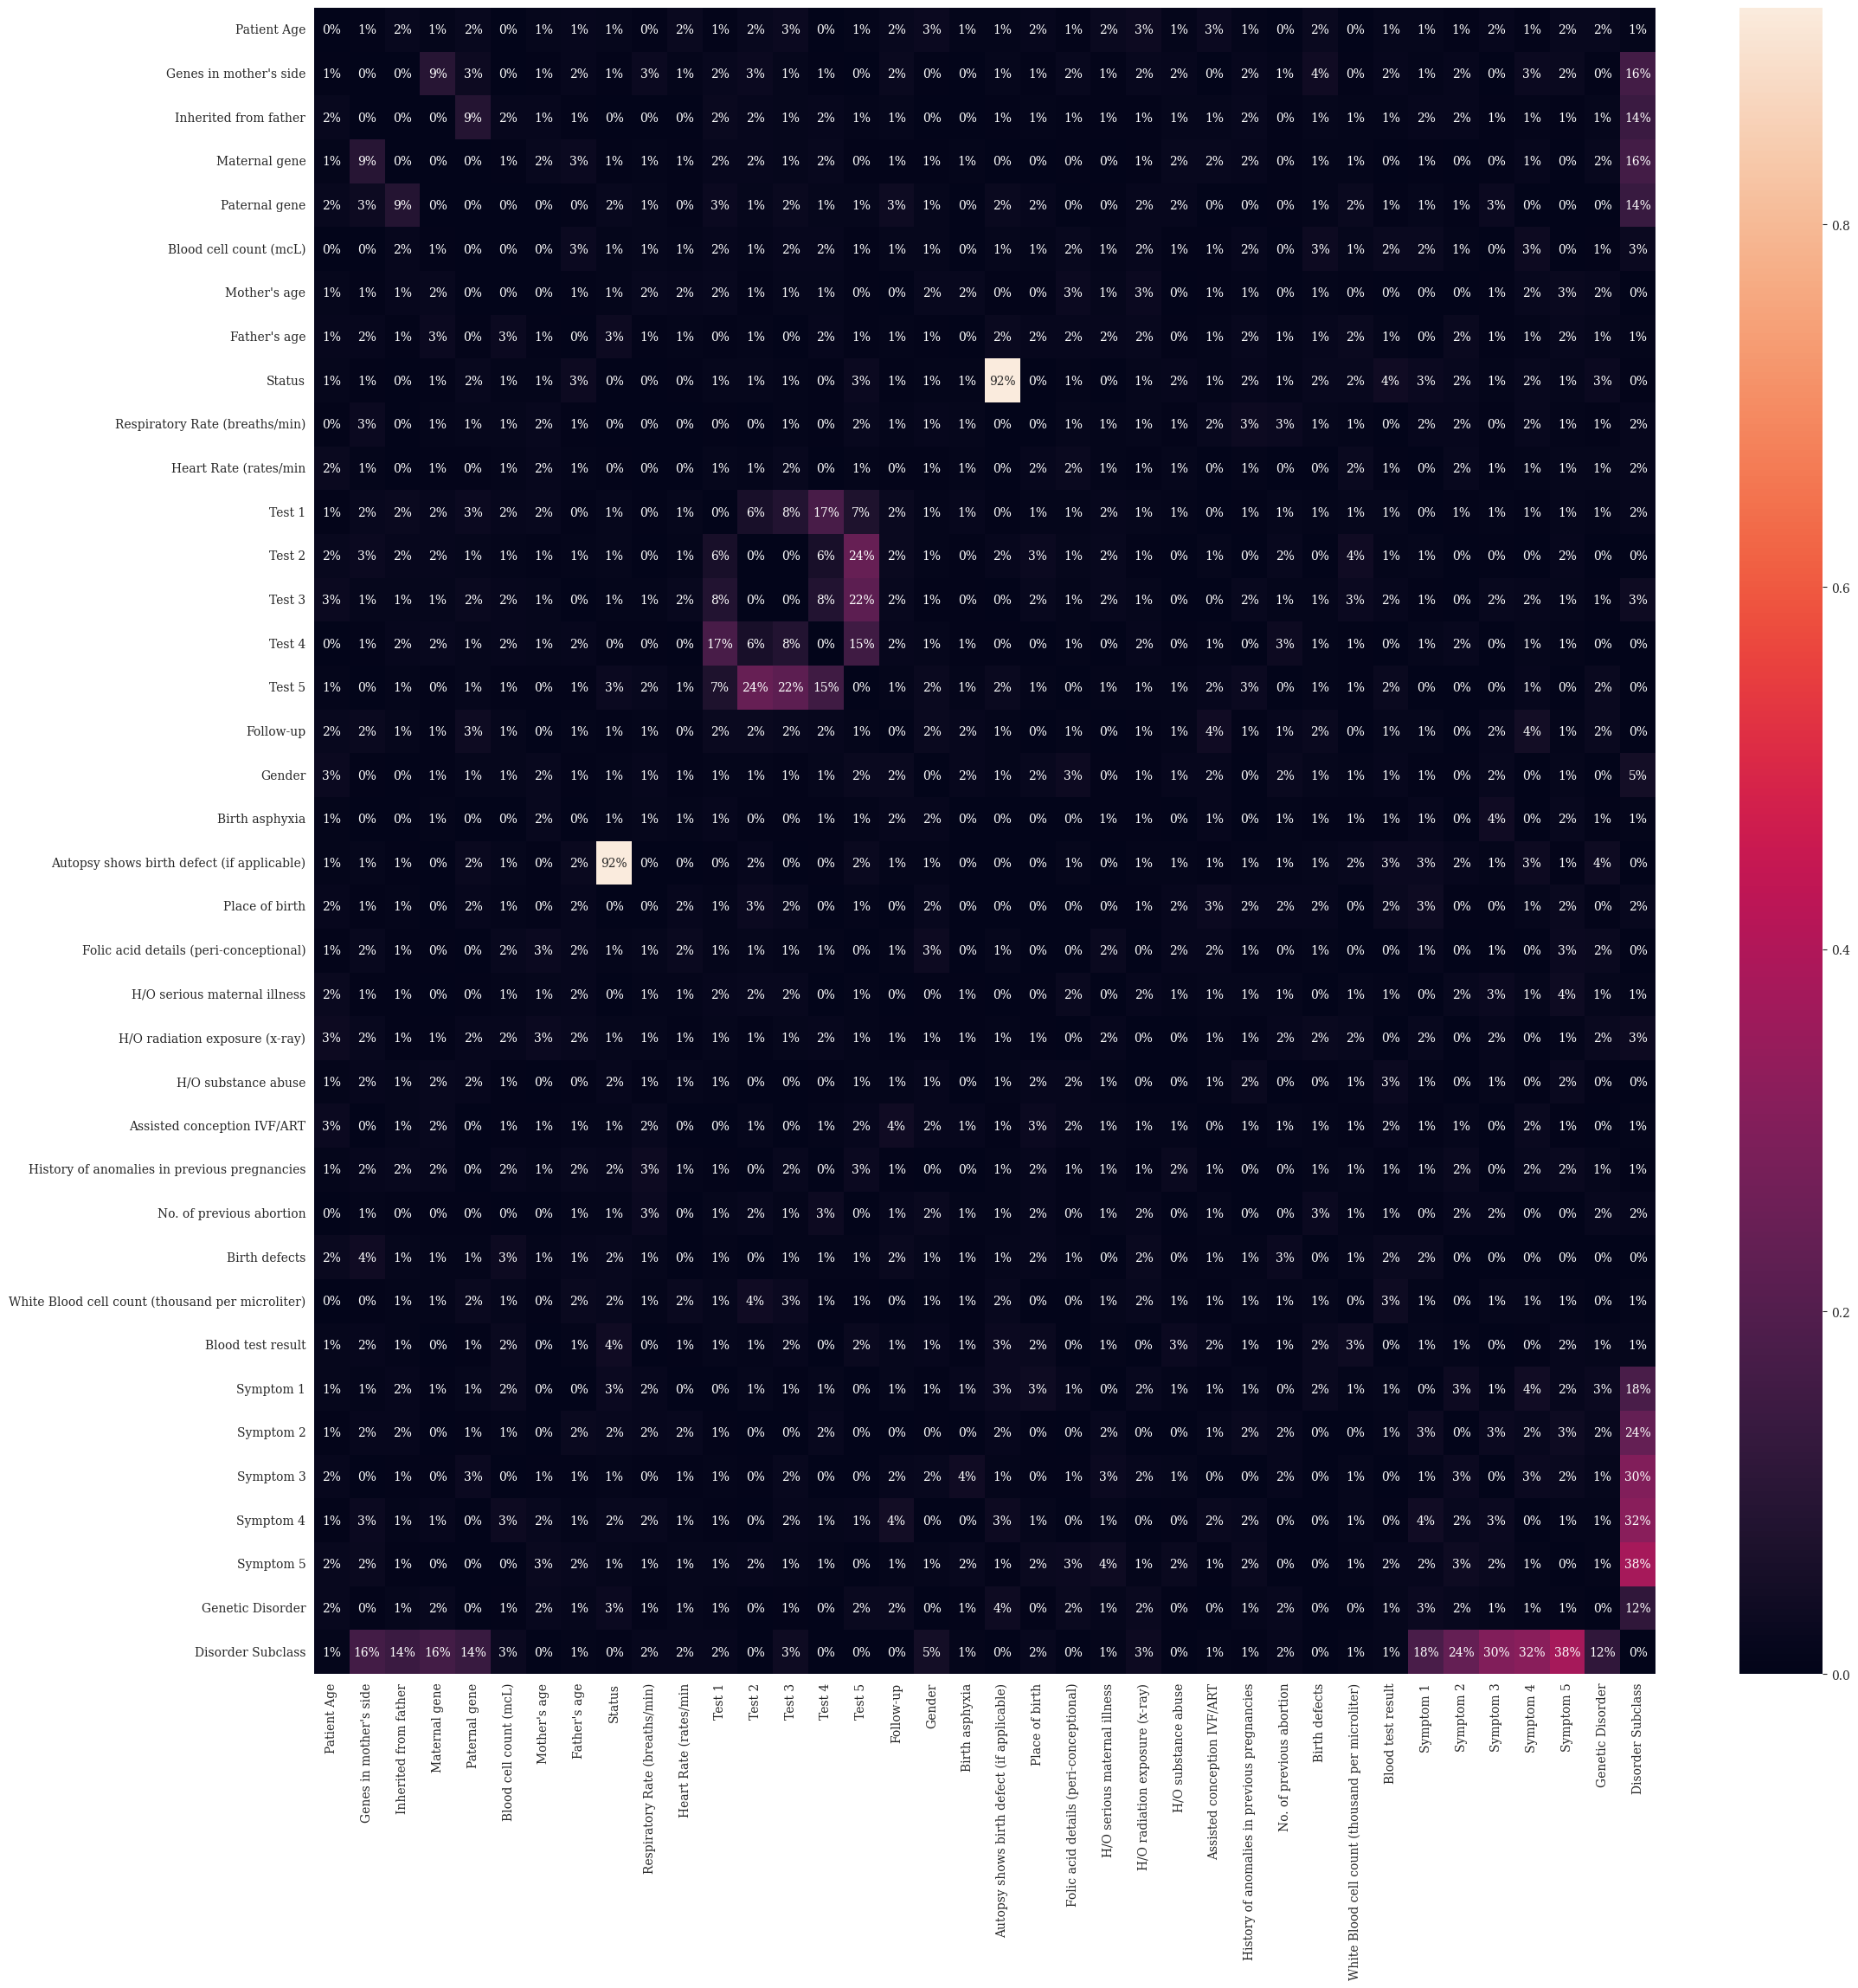

In [288]:
corr = heat_data.corr().applymap(lambda x: 0 if x > 0.99 else abs(x))
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".0%")

In [292]:
corr_gd = heat_data.corr()['Disorder Subclass'].drop(['Disorder Subclass', 'Genetic Disorder'])
corr_gd = corr_gd[abs(corr_gd) > 0.04]
X_train, X_test, Y_train, Y_test = train_test_split(heat_data.loc[:, corr_gd.index], heat_data.loc[:, 'Disorder Subclass'], test_size=0.2, random_state=43)

In [293]:

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.63it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 4082, number of used features: 10
[LightGBM] [Info] Start training from score -3.344529
[LightGBM] [Info] Start training from score -1.651210
[LightGBM] [Info] Start training from score -1.246170
[LightGBM] [Info] Start training from score -1.851313
[LightGBM] [Info] Start training from score -1.369291
[LightGBM] [Info] Start training from score -2.603915


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.45,0.52,None,0.44,0.01
AdaBoostClassifier,0.48,0.51,None,0.47,0.12
QuadraticDiscriminantAnalysis,0.50,0.49,None,0.50,0.01
LinearDiscriminantAnalysis,0.51,0.48,None,0.51,0.04
LogisticRegression,0.51,0.48,None,0.51,0.04
SVC,0.49,0.44,None,0.48,0.45
ExtraTreesClassifier,0.45,0.43,None,0.44,0.25
XGBClassifier,0.45,0.43,None,0.45,0.19
LGBMClassifier,0.46,0.43,None,0.45,0.18


In [228]:
neig = np.arange(2, 40)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train, Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label='Testing Accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))0.68


SyntaxError: invalid syntax (3506188391.py, line 26)